# The purpose of this jupyter notebook is to make a model that will determine the sentiment of a body of text.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [150]:
# Read in the Yelp review data

yelp = pd.read_csv('yelp.csv')

# Show the first few columns of the data
yelp.head()
yelp["stars"].min()

1

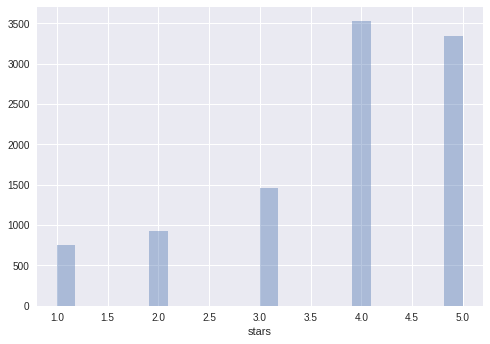

In [4]:
# Show the distribution of the Review data

sns.distplot(yelp["stars"], kde=False, rug=False)
plt.show()

** Note, from the above plot, the data set is biased towards 4 and 5 star reviews. This may introduce some bias into the model, so we will balance the data.**

In [5]:
# This cell will balance the data for the model

# let us first randomize the yelp data
yelp = yelp.sample(frac=1)

df_1_star = yelp[yelp["stars"]== 1]

# The number of one star reviews
num_1_star=df_1_star.count()[0]

# now we choose the first N reviews of a certain star number
df_2_star = yelp[yelp["stars"]== 2].head(num_1_star)
df_3_star = yelp[yelp["stars"]== 3].head(num_1_star)
df_4_star = yelp[yelp["stars"]== 4].head(num_1_star)
df_5_star = yelp[yelp["stars"]== 5].head(num_1_star)

# Now we combine all of the data frames
frames = [df_1_star,df_2_star,df_3_star,df_4_star,df_5_star]

yelp_balanced = pd.concat(frames)

# Shuffle the data frame to randomize everything
yelp_balanced = yelp_balanced.sample(frac=1)
yelp_balanced.index = range(0,yelp_balanced.shape[0]) # Relabel the indices
yelp_balanced.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,vA8T8QXh78iSXhxShLNgQA,2010-05-17,F7_kvr01KHD9l2hckfXbnA,2,"On the verge of just giving one star I, I figu...",review,usQTOj7LQ9v0Fl98gRa3Iw,2,2,2
1,V1nEpIRmEa1768oj_tuxeQ,2008-11-09,aGjSwMpcgnjeAvIA3NF9Wg,3,I like this quaint little restaurant although ...,review,jWvzAN1czxypi-GM1KY62g,1,1,0
2,JoqrcQuzD3yEvs9KvN82ag,2012-05-08,xqRrpg2VyIxEOD-G6t_8Hw,1,This wendy's is terrible. I grew up going to W...,review,sRgUoLpEWhu6jnr6Nqr9-w,0,2,0
3,v1vi2ph9YLAXGqV2WTuN7Q,2010-05-10,dz1HrU8KNaPb4BfCDO3BLg,4,This is one of the only places in Phoenix that...,review,vipSiSxRH0fIo9qbfjsHpg,0,1,0
4,-cKWUXE-16M1R15UOt6sqQ,2010-06-10,d_IcD1Ho5uZaV6e0A02nNQ,1,I used to love Banana Republic. I stopped by ...,review,XmpqbfSu9X7mjwJGUXTrAQ,0,0,0


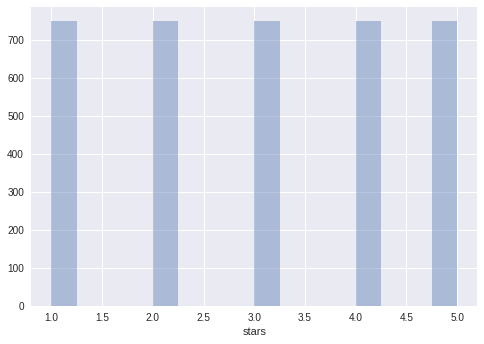

In [6]:
# Show the distribution of the Balanced Review data

sns.distplot(yelp_balanced["stars"], kde=False, rug=False)
plt.show()



Now we see that the dataset is balanced. This should help eliminate the bias of our training algorithms.

In [95]:
# Now we need to process the text. We define here a function that will remove the punctuation and stopwords

import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

# In case we dont have the nltk stopwords documents
nltk.download("stopwords")

@np.vectorize
def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    words = filter(lambda x: x not in stopwords.words('english'), tokens)
    #words = [char for char in text if char not in string.punctuation]
    return " ".join(words)

print("Total number of data: ",yelp_balanced.shape[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sovereign/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Total number of data:  3745


In [438]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# Let us now generate a subset of the data to create a vocabulary with
n_sample = 3000
n_features = 200 # Number of features to use for constructing the dictionary
dict_sample = []

# Now we preprocess the entire balanced data set
# yelp_balanced.shape[0]
for i in tqdm(range(0,n_sample)):
    sentence = yelp_balanced["text"][i]
    dict_sample.append(preprocess(sentence))

    # Convert to numpy array
dict_sample = np.asarray(dict_sample)


# Instantiate the object
count_vec = CountVectorizer(max_features=n_features)

# Bag of word model
bow = count_vec.fit(dict_sample)


print("The size of the vocabulary is: ", len(bow.vocabulary_))

100%|██████████| 3000/3000 [03:43<00:00, 13.42it/s]


The size of the vocabulary is:  200


In [440]:
from sklearn.model_selection import train_test_split

# Now we must transform our original review data into a feature Matrix

X = []
y = []

# converting the data frame into a feature matrix
for i in range(0,yelp_balanced.shape[0]):
    X.append(yelp_balanced['text'][i])
    y.append(yelp_balanced['stars'][i])

X = np.asarray(X)
y = np.asarray(Y)

X = bow.transform(X)

# Now we split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=101)



In [441]:
# We compare the results of different classifiers, relative to the basiline model (random guessing) for reference


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from numpy.random import randint

# Now we train different models
nb = MultinomialNB()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(max_depth=2, random_state=0)
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')


nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


preds_bl = randint(1,6,len(y_test))
preds_nb = nb.predict(X_test)
preds_dt = dt.predict(X_test)
preds_rf = rf.predict(X_test)
preds_lr = lr.predict(X_test)

print('================================================================\n')
print("Baseline Model: \n",classification_report(y_test,preds_bl))
print('================================================================\n')
print("Naive Bayes: \n" ,classification_report(y_test,preds_nb))
print('================================================================\n')
print("Desicion Tree: \n",classification_report(y_test,preds_dt))
print('================================================================\n')
print("Random Forests: \n",classification_report(y_test,preds_rf))
print('================================================================\n')
print("Logistic Regression: \n",classification_report(y_test,preds_lr))
print('================================================================\n')


Baseline Model: 
              precision    recall  f1-score   support

          1       0.20      0.20      0.20       744
          2       0.17      0.17      0.17       742
          3       0.20      0.20      0.20       744
          4       0.19      0.19      0.19       736
          5       0.16      0.16      0.16       742

avg / total       0.18      0.18      0.18      3708


Naive Bayes: 
              precision    recall  f1-score   support

          1       0.34      0.19      0.24       744
          2       0.25      0.30      0.27       742
          3       0.24      0.17      0.20       744
          4       0.24      0.40      0.30       736
          5       0.34      0.30      0.32       742

avg / total       0.28      0.27      0.27      3708


Desicion Tree: 
              precision    recall  f1-score   support

          1       0.30      0.10      0.14       744
          2       0.22      0.19      0.21       742
          3       0.27      0.17      0

/home/sovereign/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Comments:

* From these results, it seems that the best classifier is the __multinomial naive bayes__, this is the classifier that we will use for the subsequent investigation. 
* It seems that 2-3 star reviews are fairly indistinguishable since the multiclass classifier obtains precision scores similar to the baseline model. Therefore, we should just use two outcomes, positive or negative (1 or 0, respectively).

In [431]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

# Now we must transform our original review data into a feature Matrix with two outputs (0,1)

X_bin = []
y_bin = []

# Maps (1,2) -> 0, (4,5) -> 1, and 3 -> random number (0,1)
def mapping(x):
    
    if(x==1):
        s = 0
    elif(x==2):
        s = 0
    elif(x==3):
        s = randint(0,2)
    elif(x==4):
        s = 1
    elif(x==5):
        s =1
    else:
        s=x
    
    return s


# converting the data frame into a feature matrix, using the mapping function above.
for i in range(0,yelp_balanced.shape[0]):
    X_bin.append(yelp_balanced['text'][i])
    y_bin.append(mapping(yelp_balanced['stars'][i]))

X_bin = np.asarray(X_bin)
y_bin = np.asarray(y_bin)

X_bin = bow.transform(X_bin)

# Now we split the data into a training and test set
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2)


# Now we train different models
nb_bin = MultinomialNB()


nb_bin.fit(X_bin_train, y_bin_train)

# Make predictions using the model we trained
preds_bl_bin = randint(0,2,len(y_bin_test))
preds_nb_bin = nb_bin.predict(X_bin_test)

print('================================================================\n')
print("Baseline Model: \n",classification_report(y_bin_test,preds_bl_bin))
print('================================================================\n')
print("Naive Bayes: \n" ,classification_report(y_bin_test,preds_nb_bin))



Baseline Model: 
              precision    recall  f1-score   support

          0       0.47      0.46      0.47       368
          1       0.49      0.50      0.50       381

avg / total       0.48      0.48      0.48       749


Naive Bayes: 
              precision    recall  f1-score   support

          0       0.78      0.76      0.77       368
          1       0.77      0.80      0.78       381

avg / total       0.78      0.78      0.78       749



In [432]:
# Lets construct a validation set to test overfitting

X_bin_data, X_bin_validation, y_bin_data, y_bin_validation = train_test_split(X_bin, y_bin, test_size=0.2)

print(X_bin_data.shape)
print(X_bin_validation.shape)

(2996, 2000)
(749, 2000)


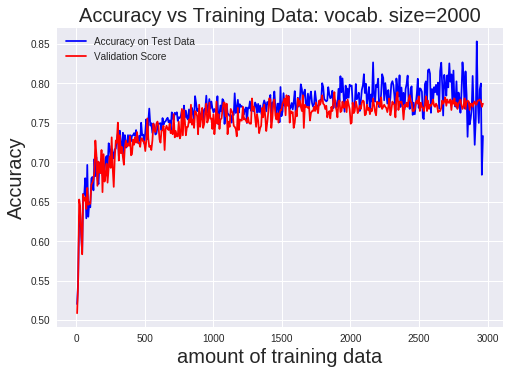

In [437]:
# Let us examine to see of we have any indication of overfitting
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

N= []
sc = []
sc_val = []

for p in np.linspace(0.01,1.0,400,endpoint=False):
    
    # Now we split the data into a training and test set
    X_bin_train2, X_bin_test2, y_bin_train2, y_bin_test2 = train_test_split(X_bin_data, y_bin_data, test_size=p)


    # Now we train Multinomial Bayes eacg time
    nb_bin = MultinomialNB()


    nb_bin.fit(X_bin_train2, y_bin_train2)

    # Make predictions using the model we trained
    preds_bl_bin2 = randint(0,2,len(y_bin_test2))
    preds_nb_bin2 = nb_bin.predict(X_bin_test2)
    preds_nb_bin2_val = nb_bin.predict(X_bin_validation)
    
    N.append(int((1.0-p)*y_bin_data.shape[0]))
    sc.append(accuracy_score(y_bin_test2,preds_nb_bin2))
    sc_val.append(accuracy_score(y_bin_validation,preds_nb_bin2_val))
    
N= np.asarray(N)
sc = np.asarray(sc)
st = np.asarray(st)


plt.title("Accuracy vs Training Data: vocab. size="+str(n_features),size=20)
plt.plot(N,sc,c="b",label="Accuracy on Test Data")
plt.plot(N, sc_val,c="r",label="Validation Score")
plt.xlabel("amount of training data",size=20)
plt.ylabel("Accuracy",size=20)
plt.legend()
plt.show()

# Observations

* The model accuracy appears to converge very slowly as we increase the data size